# 12-2. Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

## 모델 구성 및 컴파일

주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

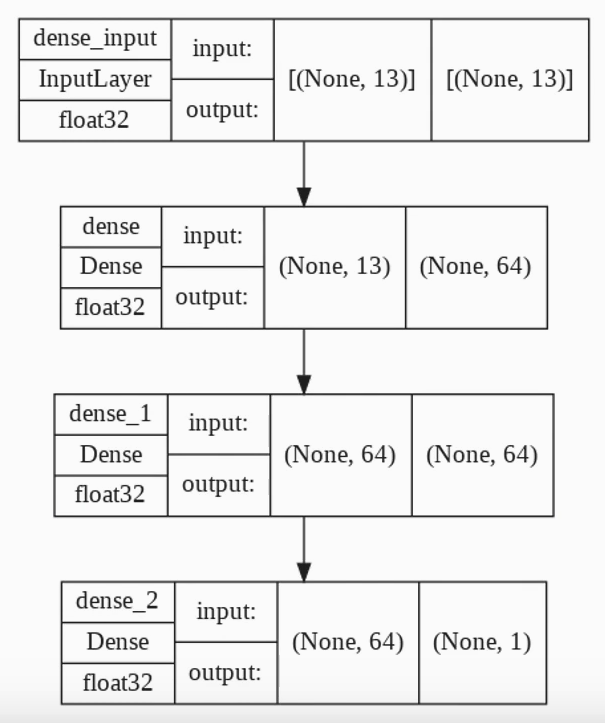

In [7]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

model.compile(loss='mse',
             optimizer='rmsprop',
             metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 28ms/step - loss: 531.6284 - mae: 21.1455 - val_loss: 558.7357 - val_mae: 21.7762
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 460.8224 - mae: 19.3970 - val_loss: 488.6199 - val_mae: 20.1348
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 390.0983 - mae: 17.6188 - val_loss: 405.0932 - val_mae: 18.1136
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 313.4520 - mae: 15.5067 - val_loss: 326.1057 - val_mae: 15.9196
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 240.6462 - mae: 13.3535 - val_loss: 250.4912 - val_mae: 13.5355
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 175.3008 - mae: 10.9938 - val_loss: 179.5411 - val_mae: 10.9051
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 122.0356 - mae: 8.8651 - val_loss: 128.2371 - val_mae: 8.7999
Epoch 8/100
11/11 [=======================

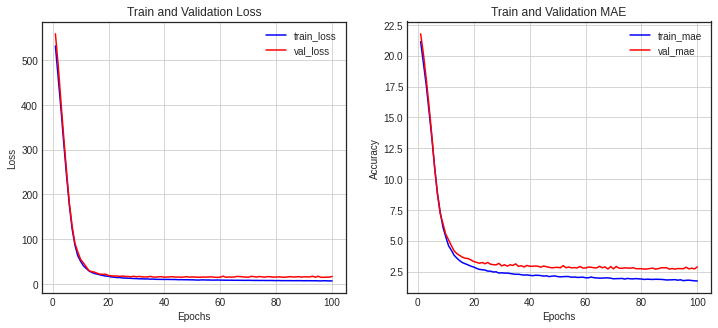

In [10]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [13]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 23.2691 - mae: 2.9495


[23.26912498474121, 2.949519157409668]

# 12-3. Reuters 딥러닝 모델

- ReLU와는 다른 활성화함수를 사용해보고, 
- BatchNormalization과 Dropout을 적용해 봅시다. 
- ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.

## 데이터 로드 및 전처리

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks, utils
from keras.datasets import reuters

In [17]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)  # 10000개로만 제한하여 데이터를 로드

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

7185
1797
2246
46


In [18]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

## 모델 구성 및 컴파일

- BatchNormalization과 
- Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 
- 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

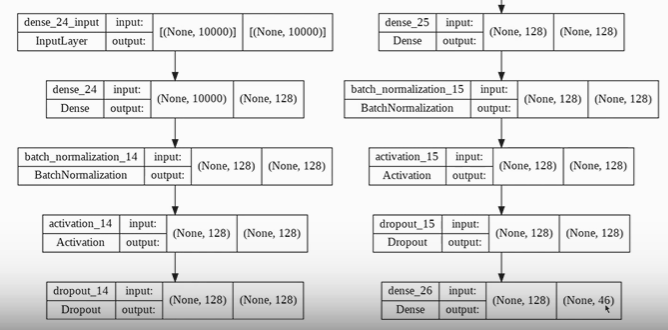

In [38]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

## 모델 학습

- ModelCheckpoint와 
- EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [39]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

In [40]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
15/15 [==============================] - 1s 36ms/step - loss: 1.9913 - accuracy: 0.5628 - val_loss: 3.0349 - val_accuracy: 0.7201
Epoch 2/30
15/15 [==============================] - 0s 15ms/step - loss: 0.9810 - accuracy: 0.7719 - val_loss: 2.7515 - val_accuracy: 0.7607
Epoch 3/30
15/15 [==============================] - 0s 14ms/step - loss: 0.6508 - accuracy: 0.8436 - val_loss: 2.5990 - val_accuracy: 0.7880
Epoch 4/30
15/15 [==============================] - 0s 16ms/step - loss: 0.4576 - accuracy: 0.8952 - val_loss: 2.3727 - val_accuracy: 0.7969
Epoch 5/30
15/15 [==============================] - 0s 14ms/step - loss: 0.3308 - accuracy: 0.9250 - val_loss: 2.2486 - val_accuracy: 0.8164
Epoch 6/30
15/15 [==============================] - 0s 14ms/step - loss: 0.2470 - accuracy: 0.9475 - val_loss: 1.9909 - val_accuracy: 0.8069
Epoch 7/30
15/15 [==============================] - 0s 14ms/step - loss: 0.2109 - accuracy: 0.9502 - val_loss: 1.8027 - val_accuracy: 0.8180
Epoch 8/30
15

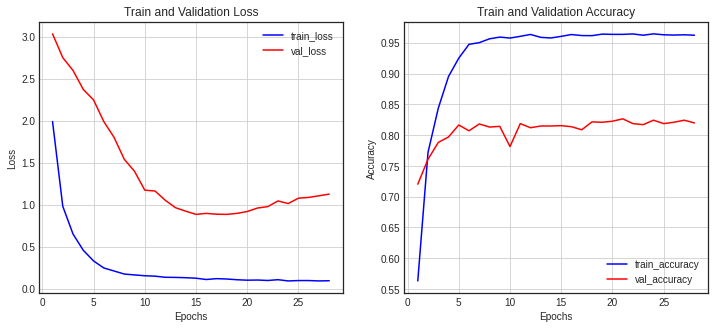

In [41]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

테스트 데이터셋을 이용해 모델을 평가합니다.

In [42]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0023 - accuracy: 0.7939


[1.0022623538970947, 0.7938557267189026]

# 12-4. CIFAR10 딥러닝 모델

- CIFAR10 데이터셋은 
    - 32x32 픽셀의 
    - 6,000개 
    - 컬러 이미지로 이루어져 있습니다. 
- 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 
- 머신러닝 연구에 가장 널리 사용되고 있습니다.

## 데이터 로드 및 전처리

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [56]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [54]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

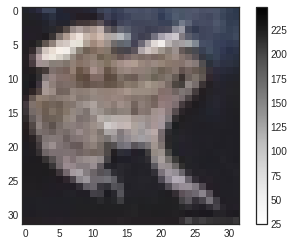

In [55]:
# 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [57]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [58]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [59]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

- BatchNormalization과 
- Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 
- 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

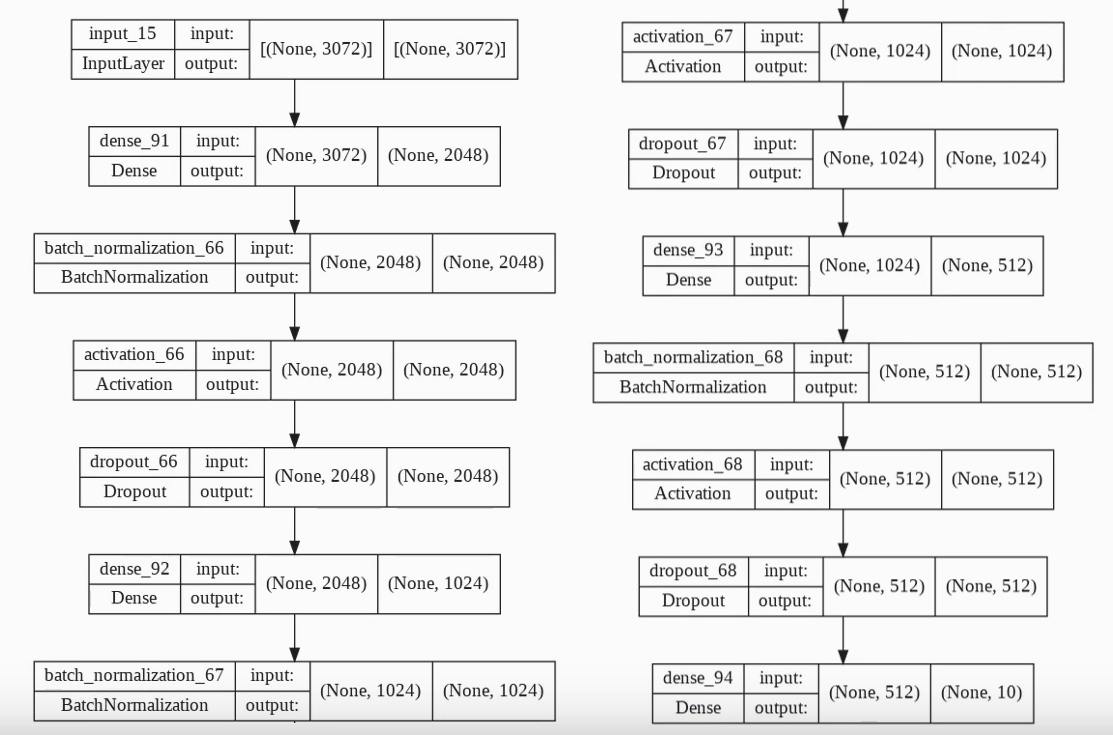

In [74]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_6 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_11 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_12 (Activation)   (None, 1024)             

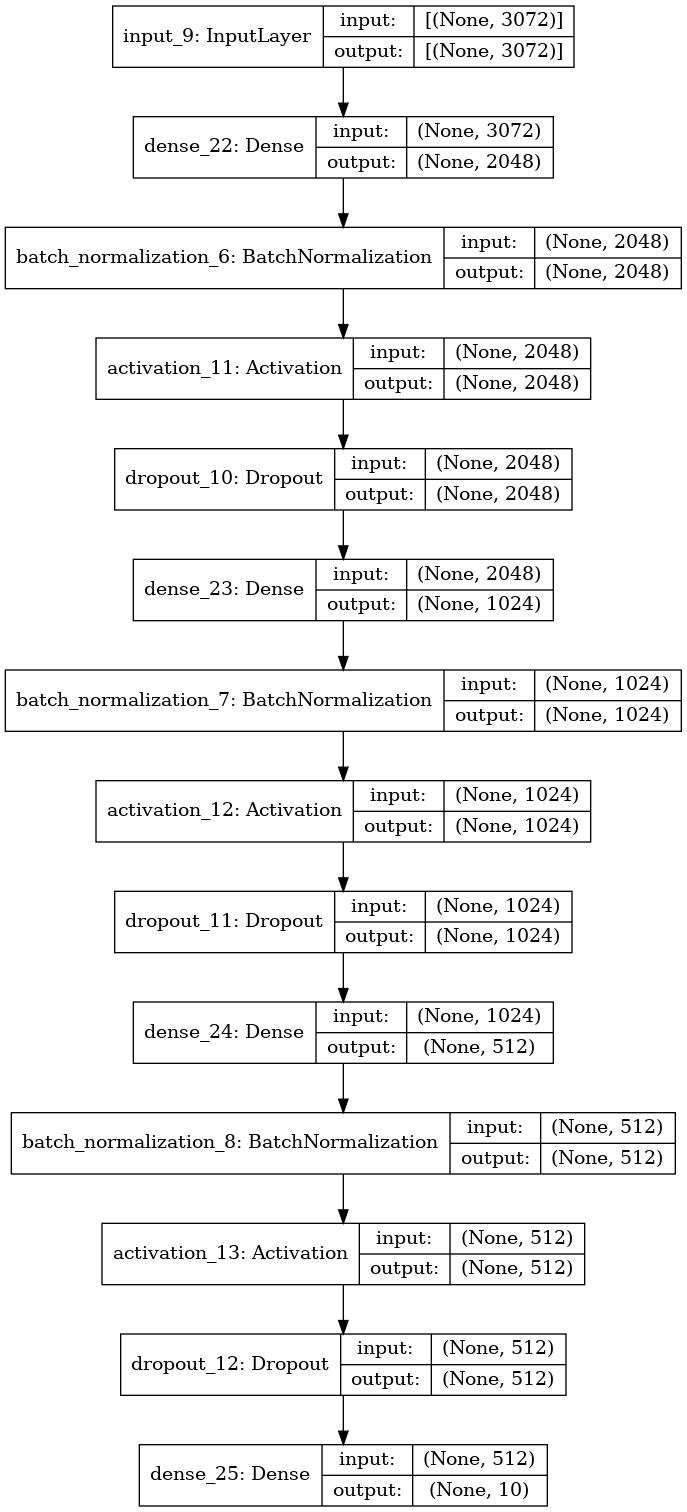

In [64]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

- ModelCheckpoint와 
- EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [75]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)
history = model.fit(x_train, y_train, 
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7926 - accuracy: 0.3659 - val_loss: 1.8236 - val_accuracy: 0.3468
Epoch 2/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5512 - accuracy: 0.4484 - val_loss: 1.9941 - val_accuracy: 0.3071
Epoch 3/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4515 - accuracy: 0.4808 - val_loss: 1.5225 - val_accuracy: 0.4551
Epoch 4/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3835 - accuracy: 0.5042 - val_loss: 1.6477 - val_accuracy: 0.4271
Epoch 5/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3263 - accuracy: 0.5290 - val_loss: 1.6108 - val_accuracy: 0.4589
Epoch 6/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.2664 - accuracy: 0.5488 - val_loss: 1.4897 - val_accuracy: 0.4727
Epoch 7/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.2182 - accuracy: 0.5662 - val_loss: 1.4879 - val_accuracy:

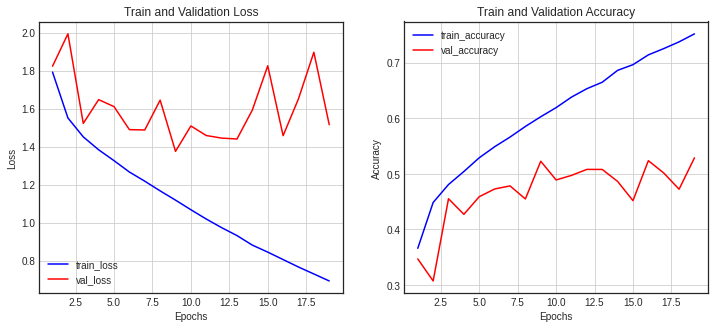

In [76]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

def show_history(history):
    history_dict = history.history
    
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss)+1)
    fig = plt.figure(figsize=(12,5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
    
    plt.show()

show_history(history)

## 모델 평가 및 예측

테스트 데이터셋을 이용해 모델을 평가합니다.

In [77]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3661 - accuracy: 0.5210


[1.3660763502120972, 0.5210000276565552]

# 회고

- 데이터 형태에 따른 전처리 과정을 비교하면서 해볼 수 있어서 잘 정리되는 느낌이었습니다. 
- 기술적인 부분도 여러번 반복해서 코딩했기 때문에 손에 좀 더 익었습니다. 
- 이미지 데이터에 알맞은 CNN을 사용하면 마지막으로 다룬 CIFAR10 모델이 어떻게 달리질지 궁금합니다. 